<a href="https://colab.research.google.com/github/mwingter/Calculo-Numerico/blob/master/Trabalho/Calculonumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Grupo:***  
*João Reis, 9293373  
Michelle Wingter da Silva, 10783243*

# **Cálculo Numérico - SME0104 - 2020**
---



- Importações para rodar as bibliotecas necessárias --------------------------------------------


In [ ]:
import numpy as np
import timeit
import time
import matplotlib.pyplot as plt

## **MÉTODO DE RESOLUÇÃO DE SISTEMAS LINEARES**

### **1. Teoria**

Utilizada nos mais diversos campos da ciência, sendo extremamente útil para resolver problemas relacionados a balanceamento de equações químicas, trâfego nas cidades e de redes e circuitos elétricos, os sistemas lineares são um conjunto de m equações lineares com n variaveis da seguinte forma:

>$S =
  \begin{cases}
    a_{1,1}x_1 + a_{1,2}x_1 + ... + a_{1,n}x_n = b_1  \\
    a_{2,1}x_1 + a_{2,2}x_1 + ... + a_{2,n}x_n = b_2  \\ 
    ...            \\
    a_{m,1}x_1 + a_{m,2}x_1 + ... + a_{m,n}x_n = b_m  \\
  \end{cases}
$

onde $ a_{i,j}, b_i \in \Re$ para $ 1 \leq i \leq m$ e $1\leq j \leq n$ e também pode ser descrito por Ax = b, onde x são as soluções. 


Este trabalho visa estudar alguns métodos numéricos utilizados para resolver sistemas lineares de uma maneira prática e rápida, possibilitando assim determinar a resposta de sistemas mais complexos. Esses métodos podem ser divididos em dois tipos: os métodos diretos, onde a solução é encontrada após um número determinado de passos e de forma exata, e os métodos indiretos, onde a solução é calculada a cada iteração, a partir de um palpite inicial, de forma com que forme uma sequência que acaba convergindo para a resposta correta. 


Para entender como cada método funciona primeiro é preciso explicar alguns conceitos e teorias utilizados por eles. Como mostrado antes, é possível escrever S na forma matricial Ax = b, onde A é a matriz dos coeficientes das equações, x é o vetor das incognitas e b o vetor de resposta.

>$A_{m,n} = 
 \begin {pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$
 
 
 > $x_n =
 \begin{pmatrix}
  x_1  \\
  x_2  \\
  \vdots    \\
  x_n 
 \end{pmatrix}$

 >$b_n =
 \begin{pmatrix}
  b_1  \\
  b_2  \\
  \vdots    \\
  b_m 
 \end{pmatrix}$

Se o determinante de A for diferente de zero, significa que suas colunas são entre si linearmente independentes e ela é denominada como não singular. Este fato implica que de tal modo que o vetor b pode ser escrito como uma  única combinação linear das colunas de A fazendo com que exista apenas uma só solução para o sistema em questão. Logo $ x = A^{-1} b $.
Existem também matrizes especiais que possuem determinadas propriedades de acordo com sua forma e que podem ser poderossímas aliadas na hora de realizar um cálculo. Um exemplo disso são as matrizes triangulares, podendo ser do tipo superior ou inferior. 
Uma matriz C para ser considerada triangular inferior deve possuir todos os elementos acima da diagonal principal iguais a zero, $C_{i,j} = 0$ para todo $i> j$. Enquanto para ser triangular superior, são os elementos abaixo que devem possuir o valor nulo, $C_{i,j} = 0$ para todo $j> i$.
Se existir um sistema linear Cx = b, ele recebe o nome de sistema triangular podendo ser dos tipos descritos acima e aparecem sobre a seguinte forma:

>\begin{equation}
  \begin{bmatrix}
     a_{1,1}\\
     a_{2,1} & a_{2,2}\\
     a_{3,1}& a_{3,2} & a_{3,3}\\
     \vdots  & \vdots & \vdots & \ddots\\
     a_{n,1} & a_{n,2} & a_{n,3} & \cdots & a_{n,n} &  
  \end{bmatrix}
  \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    \vdots \\
    x_n  
  \end{bmatrix}
  =
  \begin{bmatrix}
    b_1\\
    b_2\\
    b_3\\
    \vdots\\
    b_n
  \end{bmatrix}
\end{equation}


Esse tipo de sistema torna a resolução muito mais fácil, pois basta realizar substituições diretas para se chegar no resultado. No exemplo acima temos que $x_1 = {b_1 \over a_{1,1}}$ e $x_2 = {b_2 - a_{2,1} x_1 \over a_{2,2} }$. Se seguirmos a mesma logica, podemos chegar na equação geral de solução de um sistema triangular inferior $x_i ={ b_i - \sum_{j=1}^{i-1} a_{i,j}x_j \over a_{i,i}}$ para $i = 1,\cdots,n$. A formula para se resolver um sistema triangular superior é bem parecida com a de cima, apenas mudando o o intervalo do somatório, com j indo de i+1 até n:$x_i ={ b_i - \sum_{j=i+1}^{n} a_{i,j}x_j \over a_{i,i}}$

É importante também entendermos o conceito de sistemas lineares equivalentes, onde podemos considerar dois sistemas como iguais caso o conjunto  solução de ambos forem o mesmo. Existe um teorema que afirma que se, através de operações elementares aplicadas a um sistema linear, outro acaba sendo gerado, ambos os sistemas possuem a mesma solução e desse modo são equivalentes entre si. Isto faz com que seja possível trocar uma sistema linear complicado por um mais simples de ser resolvido, já que o resultado final não vai ser alterado.
Essas operações elementares são:
 * Trocar duas linhas da matriz. $A_i \longleftrightarrow A_j$
 * Multiplicar uma linha por um escalar $\alpha$ diferente de zero. $A_i \longleftarrow \alpha A_i$ 
 * Somar à uma linha outra linha multiplicada por um escalar $\alpha$ diferente de zero. $ A_i \longleftarrow A_i + \alpha A_j$

### Métodos diretos

Esses são procedimentos que obtém a resposta do sistema linear de maneira exata (desconsiderando erros de arrendondamento) em um determinado número de iterações. Por tal fato, a complexidade desses algoritmos são conhecidas e assim é possível calcular o tempo máximo de execução em cada caso. 
Amplamente utilizada e ensinada desde o ensino médio para a resolução desses sistemas, a regra de Cramer é um ótimo exemplo de método direto. No entanto, para uma sistema linear $nxn$ ela possui um numero máximo de iteração de ordem fatorial, o que a torna computacionalmente inviável para se resolver sistemas mais complexos.
Para então que fosse possível aplicar tais métodos para se obter a resolução de sistemas mais práticos de porte elevado, foi necessário o estudo de outros métodos diretos com complexidade de ordem polinomial. Desses métodos podemos elencar a decomposição de cholesky, decomposição LU e a eliminação de gauss.

#### Eliminação de Gauss

Dado um sistema linear Ax = b, este método de Gauss consiste em realizar uma sequência de $n-1$ operações elementares na matriz expandida $ [A|b] $ com o objetivo de gerar um sistema triangular superior equivalente. Podendo então a partir daí obter a solução do sistema através de substituições regressivas.
Para isso é necessário que o determinante de A seja diferente de zero.

>\begin{equation}
  \begin{bmatrix}
     a_{1,1}&a_{1,2}&a_{1,3}&  \cdots  & a_{1,n} & |b_1  \\
     a_{2,1} & a_{2,2} & a_{2,3} & \cdots & a_{2,n} & |b_2\\
     a_{3,1}& a_{3,2} & a_{3,3} & \cdots & a_{3,n} & |b_3\\
     \vdots  & \vdots & \vdots & \ddots & \ddots & \vdots\\
     a_{n,1} & a_{n,2} & a_{n,3} & \cdots & a_{n,n} &|  b_n  
  \end{bmatrix}
  \overrightarrow{Op.Elementares} \ 
  \begin{bmatrix}
     a'_{1,1} & a'_{1,2} & a'_{1,3} & \cdots & a'_{1,n} & |b'_1 \\
     &a'_{2,2}& a'_{2,3} & \cdots& a'_{3,3} & |b'_2\\
     &&a'_{3,3}& \cdots& a'_{3,n} & |b'_3\\
     &&&\ddots& \vdots   & \vdots\\
     &&&& a'_{n,n}  & |b'_n 
  \end{bmatrix}
\end{equation}

No entanto há algumas desvantagens ao se utilizar a eliminação de gauss. Este algoritmo não funciona quando o pivô é igual a zero e também por conta da propagação dos erros, podendo invalidar toda uma resposta. Para resolver este problema existe o método de eliminação de gauss com pivoteamento, que visa trocar o valor da diagonal para que este seja o maior possível e diferente de zero.

In [ ]:
#realiza as operações elementares na matriz A a fim de se obter a matriz triangular superior
def elimination(A, b, n):
  for i in range(n):
    pivot = A[i][i]
    for k in range(i+1,n):
      Mik = A[k][i] / pivot
      b[k] = b[k] - Mik * b[i]
      A[k] = A[k] - Mik * A[i] 
  
  return A, b
#realiza as retrosubstituições para se chegar no vetor resposta
def retro_substitution(A, b, n):
  x = np.zeros(n)
  for i in range(n-1, -1,-1):
    x[i] = b[i]
    sum = 0 
    j = n-1
    while (j>i):
      sum = sum + A[i][j] * x[j]
      j = j-1  
    x[i] = (x[i] - sum)/A[i][i]
  
  return x

def gauss_elimination(A, b, n):
  C, blinha = elimination(A,b,n)
  x = retro_substitution(C,blinha,n)
  return x

### Métodos indiretos
O problema de se utilizar métodos diretos para resolver os sistemas lineares é que eles conseomem muita memória do computador por conta do armazenamento da matriz A  que frequentemente é esparsa. Logo é benéfico o uso de métodos onde dá para se obter o $x^{(k+1)}$ através de $x^{(k)}$. Dessa forma, o resultado final é obtido depois de gerar uma sequência de vetores {$x^{(0)},x^{(1)},x^{(2)}, \cdots, x^{(k)}$} que convergem para a resposta, independente do primeiro palpite $x^{(0)}$, com $\lim_{k \to \infty} \begin{Vmatrix} x^{(k)}-x\end{Vmatrix} = 0$. (Meio confuso)

Para se obter o resultado dessa forma, o intuito desses métodos é o de criar um processo recursivo aplicado a um sistema linear equivalente. Assim é necessário transformar o sistema $Ax = b$ em $x = Cx + g$, onde C é uma matriz $nxn$ e g um vetor pertencente aos conjuntos dos reais. 

Para provar a equivalência, podemos tomar $C = I - A$ e $g = b$. Dessa forma teremos:

> $x = (I - A) x + b \Rightarrow \\x = x - Ax + b \Rightarrow \\ Ax = b$

Como o vetor resposta apenas converge no infinito, temos que utilizar alguns criterios de parada para que o algoritmo não entre em loop eterno. Neste trabalho foi utilizado os seguintes critérios:
* Erro absoluto:
  * $\begin{Vmatrix} x^{(k+1)} - x^{(k)}\end{Vmatrix} < \epsilon$
* Número máximo de iterações $ k = k_max$


#### Gauss Jacobi

Considerando o sistema linear $Ax = b$ e de que para todo $ i = 1,\cdots, n$ o valor de $a_{i,i} \neq 0$, para se chegar no sistema equivalente demonstrado acima, o método de gauss jacobi se utiliza da estratégia de isolar as coordenadas de x da diagonal principal de A, obtendo o sistema linear a seguir:


>  \begin{cases}
    x_1 = {(b_1 - a_{1,2}x_2 - a_{1,3}x_3 - \cdots - a_{1,n}x_n)\over a_{1,1}}   \\
    x_2 =  {(b_2 - a_{2,1}x_1 - a_{2,3}x_3 - \cdots - a_{2,n}x_n)\over a_{2,2}}\\
    \vdots            \\
    x_n =  {(b_n - a_{n,1}x_1 - a_{n,2}x_2 - \cdots - a_{n,n-1}x_n-1)\over a_{n,n}} \\
  \end{cases}


É possível então transformar esse sistema equivalente na forma $x = Cx +g$, onde:

>\begin{equation}
C = \begin{bmatrix}
     0 & - {a_{1,2}\over a_{1,1}}   & - {a_{1,3}\over a_{1,1}}&  \cdots  & - {a_{1,n}\over a_{1,1}}\\
     - {a_{2,1}\over a_{2,2}} & 0 & - {a_{2,3}\over a_{2,2}} & \cdots & - {a_{2,n}\over a_{2,2}}\\
     - {a_{3,1}\over a_{3,3}}& - {a_{3,2}\over a_{3,3}} & 0 & \cdots & - {a_{3,n}\over a_{3,3}}\\
     \vdots  & \vdots & \vdots & \ddots & \vdots\\
     - {a_{2,n}\over a_{2,2}} & - {a_{2,n}\over a_{2,2}} & \cdots & - {a_{n,n-1}\over a_{n,n}}&0  
  \end{bmatrix}
\end{equation}
>\begin{equation}
  g =
  \begin{bmatrix}
     {b_1 \over a_{1,1}}  \\
     {b_2 \over a_{2,2}}  \\
     {b_3 \over a_{3,3}}\\
     vdots\\
     {b_n \over a_{n,n}} 
  \end{bmatrix}
  \end{equation}

Para o método de gauss-jacobi convergir para a solução $ax=b$, indepedentemente da escolha do chute inicial se satisfazer ou o critérios das linhas, ou o critério das colunas, cujo o módulo do maior valor de $ a_k$ seja menor em módulo do que 1. 
 * Critério das linhas: 
> $ a_k = 	{ \sum_{\overset{j=1}{j \neq k}}^{n} |a_{k,j}| \over |a_{k,k}|}$
 * Critério das colunas:
>  $ a_k = 	{\sum_{\overset{i=1}{i \neq k}}^{n} |a_{i,k}| \over |a_{k,k}|}$

É interessante notar que para passar nesses critérios a matriz deve ser estritalmente diagonal dominante e que quanto menor o valor de  $ a_k $ mais rápida é a convergência.


In [ ]:
def gauss_jacobi(A,b,x,n,epsilon,limit):
  k = 1
  errors = []
  #critérios de paradas
  while (np.max(np.abs(x[1]-x[0])) > epsilon) and (k < limit):
    print("Iteração %d" % k)
    errors.append(np.max(np.abs(x[1]-x[0])))
    if (k!=1): x[0] = x[1]
    for i in range(n):
      sum = 0 
      for j in range(n):
        if j != i: 
          sum = sum + (A[i][j] * x[0][j])
      x[1][i] = ((b[i] - sum) / A[i][i])
    k = k + 1
    print("Erro: ", np.max(np.abs(x[1]-x[0]))) # printando os erros, melhor salvar em vetor isso
  return x[1], k, errors

### Gauss Seidel
O metodo de gauss seidel utiliza a mesma teoria que gauss jacobi, com a adição de que no cálculo de $x_i^{(k+1)}$ ele utiliza os valores mais atualizados da k +1 iteração para os j < i.

Para verificar a convergência, é necessário que o valor de b_i, seguindo a formula a seguir, seja em módulo menor do que um.
 > $ b_i = 	{\sum_{\overset{j=1}{j \neq k}}^{n} |a_{k,j}| \beta _j \over |a_{k,k}|}$


In [ ]:
def iteration(A, b, xi, x, n): ##iteração k, em que se calcula os valores do array x
    for i in range(n):
        sum1 = 0 
        sum2 = 0
        for j in range(0, i):
            sum1 = sum1 + A[i][j] * x[j]
        for j in range (i+1, n):
            sum2 = sum2 + A[i][j] * xi[j]
        x[i] = (1/A[i][i]) * (b[i] - sum1 - sum2)

def stopCriteria(x, xi, n, e): #Critério de parada. Se retornar true, o critério foi satisfeito; se false, não foi.
    max = -99999
    for i in range(n):
        tot = abs(x[i] - xi[i])

        if(max < tot):
            max = tot
    if(max < e):
        print("Erro: ", max)
        return True
    else:
        print("Erro: ", max)
        return False

def gauss_seidel(A, b, xi, x, e, n, limit):
    k = 1 #contador de iterações
    
    while(k < limit): # limite máximo de iterações
        print("Iteração %d :" % k )
        iteration(A, b, xi, x, n)
        if (stopCriteria(x, xi, n, e)):
            return x,k
        else:
            k = k + 1
            for i in range(n):
                xi[i] = x[i]

### **3. Aplicação**

Comparando os métodos diretos produzidos no trabalho e o da blibioteca NUMPY

In [ ]:
i = 4 #dimensão do sistema
C = np.array([[1,1,0,3],[2,1,-1,1],[3,-1,-1,2],[-1,2,3,-1]]) #matrix do sistema linear
d = np.array([4,1,-3,4]) #vetor solução

inicio1 = time.time()
xpython = np.linalg.solve(C, d)
fim1 = time.time()

inicio2 = time.time()
gauss = gauss_elimination(C, d, i)
fim2 = time.time()

In [ ]:
print("Resultado do linalg.solve:", xpython)
print("Tempo de execução:", fim1-inicio1)

print("Resultado da eliminação de gauss:", gauss)
print("Tempo de execução:", fim2-inicio2)

Resultado do linalg.solve: [-1.00000000e+00  2.00000000e+00 -1.48029737e-16  1.00000000e+00]
Tempo de execução: 0.0005774497985839844
Resultado da eliminação de gauss: [-1.  2.  0.  1.]
Tempo de execução: 0.00040721893310546875


Os valores são diferentes por conta de algum erro de aproximação. É possível ver que nosso algoritmo foi um pouco mais rápido, mas não a ponto de ser algo conclusivo, já que talvez tal diferença possa ser devida ao overhead de se utilizar uma função de biblioteca.

Aplicando os métodos iterativos sobre a mesma matriz para observamos o erro pela iteração de ambos.

In [ ]:
n = 3 #dimensão do sistema
A = np.array([[6,3,1],[4,9,-3],[1,-1,3]]) #matrix do sistema linear
b = np.array([10,16,14]) #vetor solução
x1 = np.array([-1.8,5.5,7.3]) # chute inicial
x0 = np.zeros(3)
x = np.vstack((x1,np.zeros(3)))
epsilon = 0.000001 #erro
limit = 1000000 #limite de iteracao

In [ ]:
z, k, er = gauss_jacobi(A,b,x,n,epsilon,limit)
print("Reposta do sistema linear pelo metodo de gauss jacobi:", z)

Iteração 1
Erro:  0.5000000000000002
Iteração 2
Erro:  0.2777777777777781
Iteração 3
Erro:  0.12222222222222268
Iteração 4
Erro:  0.06790123456790154
Iteração 5
Erro:  0.03504801097393706
Iteração 6
Erro:  0.020115073921658677
Iteração 7
Erro:  0.011923571948719847
Iteração 8
Erro:  0.0071648122745515685
Iteração 9
Erro:  0.004760476703904892
Iteração 10
Erro:  0.0029677918150841087
Iteração 11
Erro:  0.0021250307601823337
Iteração 12
Erro:  0.00135424760343561
Iteração 13
Erro:  0.0010096357071471829
Iteração 14
Erro:  0.0006644152182415652
Iteração 15
Erro:  0.0004945495172261616
Iteração 16
Erro:  0.00033940384532193946
Iteração 17
Erro:  0.0002456420828540473
Iteração 18
Erro:  0.00017167645666216202
Iteração 19
Erro:  0.00012276358770968443
Iteração 20
Erro:  8.647508547454663e-05
Iteração 21
Erro:  6.15179010017286e-05
Iteração 22
Erro:  4.348059892045342e-05
Iteração 23
Erro:  3.086298687726696e-05
Iteração 24
Erro:  2.184574348884638e-05
Iteração 25
Erro:  1.5491456538008208e-0

In [ ]:
a1,a2 = gauss_seidel(A, b, x1, x0, epsilon, n, limit)
print("Resposta do método iterativo Gauss-Seidel:", a1)

Iteração 1 :
Erro:  0.4999999999999998
Iteração 2 :
Erro:  0.15370370370370434
Iteração 3 :
Erro:  0.0691243712848646
Iteração 4 :
Erro:  0.03712756919394655
Iteração 5 :
Erro:  0.019195472083692433
Iteração 6 :
Erro:  0.01000151081699352
Iteração 7 :
Erro:  0.005202842428961407
Iteração 8 :
Erro:  0.0027074323462557004
Iteração 9 :
Erro:  0.0014087873398755946
Iteração 10 :
Erro:  0.0007330595239989357
Iteração 11 :
Erro:  0.00038144490226477146
Iteração 12 :
Erro:  0.0001984836059731876
Iteração 13 :
Erro:  0.00010328028222605923
Iteração 14 :
Erro:  5.374155162218841e-05
Iteração 15 :
Erro:  2.7964237647282175e-05
Iteração 16 :
Erro:  1.4551098067805412e-05
Iteração 17 :
Erro:  7.5716154896987575e-06
Iteração 18 :
Erro:  3.939864940960547e-06
Iteração 19 :
Erro:  2.050095620376169e-06
Iteração 20 :
Erro:  1.0667604382064155e-06
Iteração 21 :
Erro:  5.550852457680833e-07
Resposta do método iterativo Gauss-Seidel: [-2.0000006   5.0000005   7.00000037]


É notável que o método de gauss seidel converge mais rápido que o método de jacobi justamente por utilizar os valores mais atualizados no cálculo iterativo

## **MÉTODO DOS MÍNIMOS QUADRADOS**

### **1. Teoria**

Muitos problemas do dia-a-dia possuem erros, ou seja, valores incorretos gerados pelas coletas experimentais do problema a ser resolvido. O método dos mínimos quadrados veio da necessidade desses casos, em que precisamos aproximar valores para a função fora de um intervalo tabelado, ou ajustar pontos tirados de algum experimento. Por exemplo, em física experimental, ele considera os erros de medição.
 
Assim, o problema que iremos resolver com o método dos mínimos quadrados é obter, dado um conjunto de funções conhecidas, a melhor reta ou curva que aproxima essas funções.
 
Sendo assim, dados $m$ pontos de $f(x)$ em uma tabela contidos em um intervalo $[a,b]$, o método consiste em escolhermos $n$ (onde $n < m$) funções contínuas em $[a,b]$ (denotaremos tais funções como $h_1(x), h_2(x), …, h_n(x)$ ) e obter $n$ constantes ($c_1, c_2, …, c_3$), de modo que o polinômio $p(x)$:    
 
> $p(x) = c_1h_1(x) + c_2h_2(x) + … + c+nh_n(x)$ 
 
seja o mais próximo possível de $f(x)$, ou seja, queremos minimizar o desvio entre $f(x)$ e $p(x)$ de modo que o erro seja o menor possível. Para encontrar este erro, basta calcular: 
 
> $ min (\sum_{k=1}^m(f(x_k) - p(x_k))^2) $
 
Portanto, para encontrar o polinômio $p(x)$ basta calcular o sistema de equações lineares do tipo $Ax=b$ abaixo:
 
> $ \begin{bmatrix}  
      \langle \overline{h_1},\overline{h_1}  \rangle & \langle \overline{h_1},\overline{h_2}  \rangle & ... & \langle \overline{h_1},\overline{h_n}  \rangle \\      \langle \overline{h_2},\overline{h_1}  \rangle & \langle \overline{h_2},\overline{h_2}  \rangle & ... & \langle \overline{h_2},\overline{h_n}  \rangle \\ ... & ... & ... & ...\\
       \langle \overline{h_n},\overline{h_1}  \rangle & \langle \overline{h_n},\overline{h_2}  \rangle & ... & \langle \overline{h_n},\overline{h_n}  \rangle \end{bmatrix}
      \begin{bmatrix} c_1 \\ c_2 \\ ... \\ c_3\end{bmatrix} = 
      \begin{bmatrix} \langle \overline{f},\overline{h_1}  \rangle \\ \langle \overline{f},\overline{h_2}  \rangle \\ .. \\ \langle \overline{f},\overline{h_n}  \rangle \end{bmatrix}$
 
que possui solução única ($c_1, c_2, ..., c_n$), onde $\langle \overline{a},\overline{b}  \rangle$ é o produto escalar de $a$ por $b$, e a matriz $A$ é simétrica $(n\times n)$.
 
**- Caso Não-Linear**
 
Os casos acima são válidos para casos Lineares. No entanto, é possível também que os casos sejam não-lineares, e, para resolver isto, basta linearizá-los e então resolvê-los normalmente como mostrado acima. A forma de linearizar as funções depende do tipo do problema. Alguns casos de linearização são, por exemplo:
 
> **1) $f(x) \approx \frac{1}{c_1 + c_2x} = p(x)$**
 
$\frac{1}{f(x)} \approx c_1 + c_2 x = \phi (x)$
 
 
> **2) $f(x) \approx c_1 e^{c_2 x} = p(x)$**

$ln(f(x)) \approx ln(c_1) + c_2 x = a_1 + a_2 x = \phi (x)$

Resolvendo este sistema linear, obtemos:

$a_1 = ln(c_1) \Longrightarrow c_1 = e^a_1$

$a_2 = c_2 \Longrightarrow c_2 = a_2$
 
 
> **3) $f(x) \approx c_1 c_2^x = p(x)$**
 
$ln(f(x)) \approx ln(c_1) + xln(c_2) = a_1 + a_2 x = \phi (x)$ 
 
Resolvendo este sistema linear, obtemos:
 
$a_1 = ln(c_1) \Longrightarrow c_1 = e^{a_1}$
 
$a_2 = ln(c_2) \Longrightarrow c_2 = e^{a_2}$
 
 
> **4) $f(x) \approx c_1 x^{c_2} = p(x)$**
 
$ln(f(x)) \approx ln(c_1) + c_2 ln(x) = a_1 + a_2 ln(x) = \phi (x)$
 
Resolvendo este sistema linear, obtemos:
 
$a_1 = ln(c_1) \Longrightarrow c_1 = e^{a_1}$
 
$a_2 = c_2$
 
> **5) $f(x) \approx \sqrt{c_1 + c_2 x} = p(x)$**
 
$[f(x)]^2 \approx c_1 + c_2 x = \phi (x)$

> **6) $f(x) \approx x ln(c_1 + c_1 x)$**

$e^{\frac{f(x)}{x}} = c_1 + c_2x = \phi (x)$



### **2. Códigos**

In [ ]:
f = np.array([0.459,0.828,1.006,1.150,1.354,1.261,1.157,0.834,0.511]) #vetor de valores f
M = np.array([[0.01,0.04,0.09,0.16,0.25,0.36,0.49,0.64,0.81],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],[1,1,1,1,1,1,1,1,1]]) #matriz com os n vetores hk
n = 3 #dimensão da matriz simétrica A

In [ ]:
def min_quadrados(f, M, n):
    A = np.zeros((n,n)) # matriz n x n cheia de zeros
    b = np.zeros(n) #vetor b de tamanho n cheia de zeros
    for i in range(n):
        for j in range(i+1):
            A[i][j] = round(np.dot(M[i],M[j]), 3) # np.dot calcula o produto escalar entre dois vetores
            A[j][i] = round(np.dot(M[i],M[j]), 3)
    
    for i in range(n):
        b[i] = round(np.dot(f,M[i]), 3)
    
    #print("A = ", A)
    #print("b = ", b)

    return A, b
    # utilizando o método de resolução de sistemas lineares para encontrar os coeficientes da solução
    #return gauss_elimination(A, b, n)

In [ ]:
A, b = min_quadrados(f,M,n)
print("Sistema Linear da solução dos mínimos quadrados:")
print("A = ", A)
print("B = ", b)

#print("Resposta dos mínimos quadrados:", min_quadrados(f, M, n))

print("Solução do Sistema Linear:", gauss_elimination(A, b, n))

Sistema Linear da solução dos mínimos quadrados:
A =  [[1.533 2.025 2.85 ]
 [2.025 2.85  4.5  ]
 [2.85  4.5   9.   ]]
B =  [2.619 4.344 8.56 ]
Solução do Sistema Linear: [-5.10382514  5.2104918  -0.0379235 ]


### **3. Aplicação**

**Aplicação 1)** Utilizando o método dos mínimos quadrados implementados para resolver o sistema linear abaixo:

Aproximar a função $f(x) = e^x$ pela parábola $p(x) = c_1 x^2 + c_2 x + c_3$.
 
Sendo: 
 
$h_1 (t) = t^2$
 
$h_2 (t) = t$
 
$h_1 (t) = 1$
 
Temos que:
 
$\overline{h_1}= (0.01,0.04,0.09,0.16,0.25,0.36,0.49,0.64,0.81)$
 
$\overline{h_2}= (0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9)$
 
$\overline{h_3}= (1,1,1,1,1,1,1,1,1)$
 
$\overline{f} = (1.105,1.221,1.348,1.491,1.64,1.822,2.013,2.22,2.459)$
 
Utilizando o método dos mínimos quadrados para chegar no sistema do tipo abaixo:
 
> $ \begin{bmatrix}  
      \langle \overline{h_1},\overline{h_1}  \rangle & \langle \overline{h_1},\overline{h_2}  \rangle & ... & \langle \overline{h_1},\overline{h_n}  \rangle \\      \langle \overline{h_2},\overline{h_1}  \rangle & \langle \overline{h_2},\overline{h_2}  \rangle & ... & \langle \overline{h_2},\overline{h_n}  \rangle \\ ... & ... & ... & ...\\
       \langle \overline{h_n},\overline{h_1}  \rangle & \langle \overline{h_n},\overline{h_2}  \rangle & ... & \langle \overline{h_n},\overline{h_n}  \rangle \end{bmatrix}
      \begin{bmatrix} c_1 \\ c_2 \\ ... \\ c_3\end{bmatrix} = 
      \begin{bmatrix} \langle \overline{f},\overline{h_1}  \rangle \\ \langle \overline{f},\overline{h_2}  \rangle \\ .. \\ \langle \overline{f},\overline{h_n}  \rangle \end{bmatrix}$


 
 


In [ ]:
f = np.array([1.105,1.221,1.348,1.491,1.64,1.822,2.013,2.22,2.459]) #vetor de valores f
M = np.array([[0.01,0.04,0.09,0.16,0.25,0.36,0.49,0.64,0.81],[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],[1,1,1,1,1,1,1,1,1]]) #matriz com os n vetores hk
n = 3 #dimensão da matriz simétrica A

A, b = min_quadrados(f,M,n)
print("Sistema Linear da solução dos mínimos quadrados:")
print("A = ", A)
print("B = ", b)

Sistema Linear da solução dos mínimos quadrados:
A =  [[1.533 2.025 2.85 ]
 [2.025 2.85  4.5  ]
 [2.85  4.5   9.   ]]
B =  [ 5.885  8.667 15.319]


Chegando no sistema:

$\begin{equation}
    \left[ \begin{array}{ccc}
        1.533 & 2.085 & 2.85 \\
        2.025 & 2.85 & 4.5 \\
        2.85 & 4.5 & 9
    \end{array} \right] \left[ \begin{array}{c}
        c_1 \\ c_2 \\ c_3
    \end{array} \right] = \left[ \begin{array}{c}
        5.885 \\ 8.667 \\ 15.319
    \end{array} \right]
\end{equation}$

 
E então utilizando o método de eliminação de gauss para resolver o sistema encontrado:
 

In [ ]:
coef = gauss_elimination(A, b, n)
print("Solução do Sistema Linear:", coef)

Solução do Sistema Linear: [0.86830601 0.81086066 1.02171721]


Obtemos, então, os coeficientes de $p(x)$:

$c_1 = 0.8683$

$c_2 = 0.8108$

$c_3 = 1.0217$

Portanto, $p(x) = 0.8683 x^2 + 0.8108 x + 1.0217

Plotando em um gráfico, podemos ver o desvio entre $f(x)$ e $p(x)$:

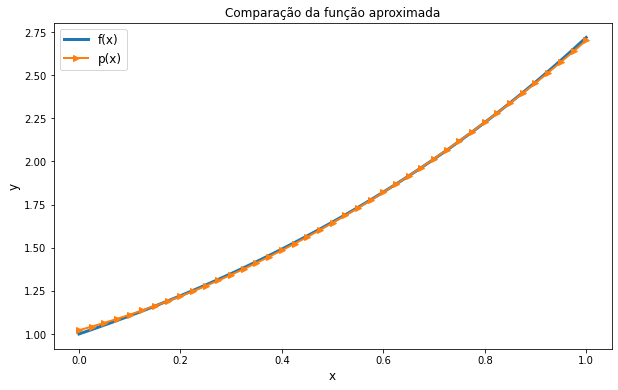

In [ ]:
p = lambda x: coef[2] + coef[1]*x + coef[0]*x**2;
x = np.linspace(0, 1, num=41, endpoint=True)
# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,np.exp(x),label = 'f(x)',linewidth = 3)
plt.plot(x,p(x),label = 'p(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação da função aproximada') 
plt.legend(fontsize='large') 
plt.show()

No gráfico acima, podemos ver que o desvio entre f(x) e p(x) é bem pequeno.

**Aplicação 2)** Utilizando o método dos mínimos quadrados para encontrar a reta $f(x)$ que melhor se ajusta a tabela de dados referente à taxa bruta de natalidade no Brasil do ano 1950 à 2000.


**Período __ Taxa bruta de natalidade**
  
 $ \begin{matrix} 
   & Período & Taxa-bruta-de-natalidade\\ 
  (0) & 1950 & 43.50\\ 
  (1) & 1960 & 44.00\\
  (2) & 1970 & 37.70\\
  (3) & 1980 & 31.87\\
  (4) & 1990 & 23.72\\
  (5) & 2000 & 21.06\\
  \end{matrix}
$


**Tabela**: Taxa bruta de natalidade no Brasil entre 1950 à 2000

Assim, sendo $f(x)$ os valores da tabela, e sendo $t$ os anos (iniciando em 0, ou seja, 1950 $\Longrightarrow$ $t=0$, 1960 $\Longrightarrow$ $t=1$, etc), temos:

$\overline{h_1}= (0,1,2,3,4,5)$
 
$\overline{h_2}= (1,1,1,1,1,1)$
 
$\overline{f} = (43.5,44.0,37.7,31.87,23.72,21.06)$

Aplicando os valores no método dos mínimos quadrados:




In [ ]:
f = np.array([43.5,44.0,37.7,31.87,23.72,21.06]) #vetor de valores f(x)
M = np.array([[0,1,2,3,4,5],[1,1,1,1,1,1]]) #matriz com os n vetores hk
n = 2 #dimensão da matriz simétrica A

A, b = min_quadrados(f,M,n)
print("Sistema Linear da solução dos mínimos quadrados:")
print("A = ", A)
print("B = ", b)

Sistema Linear da solução dos mínimos quadrados:
A =  [[55. 15.]
 [15.  6.]]
B =  [415.19 201.85]


Chegamos no sistema:

$\begin{equation}
    \left[ \begin{array}{ccc}
        55 & 15 \\
        15 & 6
    \end{array} \right] \left[ \begin{array}{c}
        c_1 \\ c_2
    \end{array} \right] = \left[ \begin{array}{c}
        415.19 \\ 201.85
    \end{array} \right]
\end{equation}$

Aplicando o método da Eliminação de Gauss para resolver o Sistema linear acima:

In [ ]:
coef = gauss_elimination(A, b, n)
print("Solução do Sistema Linear:", coef)

Solução do Sistema Linear: [-5.11057143 46.41809524]


Obtemos, então, os coeficientes de $p(x)$:

$c_1 = -5.1105$

$c_2 = 46.4180$

Portanto, a reta que melhor se ajusta à tabela de dados referente à taxa bruta de natalidade no Brasil do ano 1950 à 2000 é:

> $p(x) = -5.1105 x + 46.4180$




Plotando em um gráfico, podemos ver o desvio entre $f(x)$ e $p(x)$:

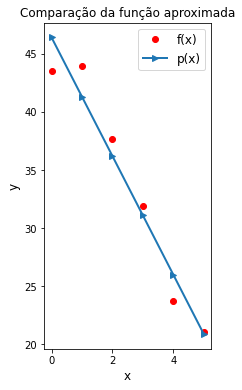

In [ ]:
p = lambda x: coef[1] + coef[0]*x
x = np.linspace(0, 5, num=6, endpoint=True)
 
plt.figure(figsize=(3,6),facecolor='white')
plt.plot(x,f,'ro',label = 'f(x)',linewidth = 3)
plt.plot(x,p(x),label = 'p(x)',linewidth = 2,marker='>')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação da função aproximada') 
plt.legend(fontsize='large') 
plt.show()


Com isso, podemos fazer uma previsão para o ano de 2020, que é representado por $x = 7$:

$p(x) = −5.1105x+46.4180$

$p(7) = −5.1105 \times 7+46.4180$

$p(7) = -35.7735+46.4180$

$p(7) = 10.6445$

Ou seja, a taxa de natalidade prevista para o ano de 2020 é de $10.65$%

## **MÉTODO DE RESOLUÇÃO DE SISTEMAS NÃO LINEARES**

### **1. Teoria**

Na vida academica, ao longo da vida, estamos acostumados a trabalhar com sistemas de equações lineares, pois estes tem propriedades que facilitam muito os cálculos. No entanto, no mundo real a maioria dos problemas não ocorrem de forma linear.

Sistemas não lineares são frequentemente utilizados para cálculos e estudo em diferentes áreas, como biológias, socais, criptografia, telecomunicações, economia, linguística, e várias outras áreas em que são considerados diversos fatores, obtendo assim diversas váriáveis, ou seja, um sistema não linear.

Uma equação que contenha uma expressão do tipo $x^2, y^{-2}, x\cdot y, z, y, sen(x), ex+z$ ,etc, é chamada não-linear em $x, y, z, ...$, porque ela não pode ser escrita como $ax + by + cz + ... = cte$ que é uma equação linear em $x, y, z$,... . 

Um sistema de equações não lineares é um conjunto de equações não lineares, onde os polinômios são de grau maior que um, resultando em infinitas variáveis. Trazendo todos os termos diferentes de zero à esquerda de todas as equações, tem-se uma forma geral que pode ser usada para qualquer sistema não-linear. 

Sendo assim, queremos resolveremos sistemas de $n$ equações não lineares e $n$ incógnitas do tipo $F(x) = 0$:

>$S =
  \begin{cases}
    f_1(x_1,x_2,...,x_n) = 0  \\
    f_2(x_1,x_2,...,x_n) = 0  \\
    ...            \\
    f_n(x_1,x_2,...,x_n) = 0  \\
  \end{cases}
$


Apesar de não ser fácil de ser resolvido, existem métodos que resolvem estes sistemas, sendo que um dos principais métodos usados para a resolução de um sistema não-linear é o **Método de Newton para Sistemas**.  

**- Método de Newton para Sistemas**

Basicamente, o Método de Newton, a partir de uma aproximação inicial $x_0$ , 
e assumindo que a função $F(x)$ é diferenciável e que existe um ponto $x_∗$ tal que $F(x_∗)= 0$, consiste em definir a sequência {$x_k$} através dos seguintes passos: 

> - A resolução do sistema linear: $J(x_k) s_k = −F(x_k)$
>
> - A atualização do novo valor $x_{k+1} = x_k + s_k$

Onde $s_k$ é a solução do sistema linear acima, e $J(x_k)$ é a matriz jacobiana dada por:

> $  
  \begin{equation*}
  J(x) = 
  \begin{bmatrix}
    \frac{∂f_1(x)}{∂x_1} 	&	\frac{∂f_1(x)}{∂x_2} & ........ &	\frac{∂f_1(x)}{∂x_n} \\
    \frac{∂f_2(x)}{∂x_1} 	&	\frac{∂f_2(x)}{∂x_2} &........ &	\frac{∂f_2(x)}{∂x_n} \\
    ...				 \\
    \frac{∂f_n(x)}{∂x_1} 	&	\frac{∂f_n(x)}{∂x_2} & ........ &	\frac{∂f_n(x)}{∂x_n}  \\
  \end{bmatrix}
  \end{equation*}
$

Com isso, são realizadas $k$ iterações, a partir da utilização destas aproximações lineares para $k = 0, 1, 2, ...$, gerando uma sequência que, sob certas hipóteses, converge para a solução. Além disso, como em qualquer método iterativo, é preciso ter um critério de parada para aceitar um ponto $x_k$ 
como uma boa aproximação da solução exata $x_∗$. Um critério de parada (utilizado na implementação do método de newton neste trabalho) é o do erro absoluto, que consiste em vericar se a norma entre duas iterações sucessivas está próxima de zero (dado um erro $e$ máximo), isto é, escolhemos $x_{k+1}$ como uma boa aproximação para a solução exata $x_∗$ , se temos $||x_{k+1} − x_k || < e$.


### **2. Códigos**

**I) Método de Newton**

In [ ]:
def toJacobian(f, x, n):
    J = np.zeros((n, n))
    for i in range(n): #para cada linha
        for j in range(n): #para cada coluna
            for k in range(n): #para cada x (x1, x2, x3, etc) -> por ex se n=2, temos x1 e x2
                if(i == k): 
                    J[i][j] = f[i][j] * (i+1) * (x[j] ** i) ##derivando e ja substituindo x
    return J

In [ ]:
def iteration_newton(n, xi, F, e):
    Jx = np.zeros((n,n)) #(A) matriz n x n cheia de zeros 
    Fx = np.zeros(n) #(b) vetor de tamanho n cheia de zeros 

    #encontrando o sistema Ax=b 
    for i in range(n): #Encontrando o 'b' (Fx)
        Fx[i] = F[i][n]
        for j in range(n):
            Fx[i] = Fx[i] + F[i][j] * (xi[j] ** (i+1))
    Jx = toJacobian(F, xi, n) #encontrando o 'A' (Jx)

    y = gauss_elimination(Jx, -Fx, n) #gauss(A,b,n) resolvendo o sistema linear A.x=b (ou Jx.x=-Fx) usando o metodo da eliminação de gauss
    x = xi + y
    return x

In [ ]:
def newton(n, xi, F, e):
    k = 1 #contador de iterações
    while (k < 25):
        x = iteration_newton(n, xi, F, e)
        if (stopCriteria(x, xi, n, e)):
            return x,k
        else:
            k = k + 1
            for i in range(n):
                xi[i] = x[i]

### **3. Aplicação**

Sistemas de equações não-lineares podem ser utilizados para, por exemplo, explicar o funcionamento do cérebro humano, pra ver quais partes se ativam ao realizarmos determinadas atividades. Para isso, devem ser levados em conta diversos fatores, considerando componentes químicos, físicos e biológicos do cérebro, obtendo diversas variáveis, ou seja, um sistema não linear para cada pessoa avaliada.
 
**Aplicação 1)** Utilizando o método de Newton para resolver o sistema não-linear $F(x)=0$, sendo:
> $\begin{equation}
  F(x) =
  \begin{bmatrix}
     {x_1 + x_2 - 5}  \\
     {x_1^2 + x_2^2 - 25}
  \end{bmatrix}
  \end{equation}$

 
e usando como aproximação inicial $x^{(0)} = [-1, 6]$ e $erro = 0.1$
 
Pelo método de Newton, encontraremos a Jacobiana $J(x)$ da forma:

> $  
  \begin{equation*}
  J(x) = 
  \begin{bmatrix}
    \frac{∂f_1(x)}{∂x_1} 	&	\frac{∂f_1(x)}{∂x_2}\\
    \frac{∂f_2(x)}{∂x_1} 	&	\frac{∂f_2(x)}{∂x_2}
  \end{bmatrix}
  \end{equation*}
$
 
- Primeira iteração ($k = 0$):

Substituindo $x^{(0)}$ em $J(x)$ e $F(x)$, obtendo então:
 
> $\begin{equation}
  F(x^{(0)}) =
  \begin{bmatrix}
     {0}  \\
     {12}
  \end{bmatrix}
  \end{equation}$
 
> $  
  \begin{equation*}
  J(x^{(0)}) = 
  \begin{bmatrix}
    1 	&	1\\
    -2 	&	12
  \end{bmatrix}
  \end{equation*}
$
 
Agora, utilizando o método da Eliminação de Gauss para resolver o Sistema Linear $J(x^{(0)})s^{(0)} = -F(x^{(0)})$:
 
Obtemos
 $\begin{equation}
  s^{(0)} =
  \begin{bmatrix}
     {0.86}  &   {-0.86}
  \end{bmatrix}
  \end{equation}$ $^T$

Então, $x^{(1)} = x^{(0)} + s^{(0)} =$ 
 $\begin{equation}
  \begin{bmatrix}
     {-0.14}  \\   {5.14}
  \end{bmatrix}
  \end{equation}$

Verificando se passa pelo critério de parada:

$max(|x^{(k+1)} - x^{(k)}|) < erro$

$|x_1^{(1)} - x_1^{(0)}| = 0.86 > erro$, portanto não passa no critério, e iremos para a próxima iteração:

- Segunda iteração ($k = 1:$)

Calculando $J(x^{(1)})$ e $F(x^{(1)})$:

> $\begin{equation}
  F(x^{(1)}) =
  \begin{bmatrix}
     {0}  \\
     {1.44}
  \end{bmatrix}
  \end{equation}$
 
> $  
  \begin{equation*}
  J(x^{(1)}) = 
  \begin{bmatrix}
    1 	&	1\\
    -0.28 	&	10.28
  \end{bmatrix}
  \end{equation*}
$

E resolvendo o sistema $J(x^{(0)})s^{(0)} = -F(x^{(0)})$:

Obtemos
 $\begin{equation}
  s^{(1)} =
  \begin{bmatrix}
     {0.14}  &   {-0.14}
  \end{bmatrix}
  \end{equation}$ $^T$

Então, $x^{(2)} = x^{(1)} + s^{(1)} =$ 
 $\begin{equation}
  \begin{bmatrix}
     {0}  \\   {5}
  \end{bmatrix}
  \end{equation}$


Verificando se passa pelo critério de parada:

$max(|x^{(2)} - x^{(1)}|) = 0 < 0.1$

Portanto, encontramos o resultado! 

$x^{(2)}=$ 
 $\begin{equation}
  \begin{bmatrix}
     {0}  \\   {5}
  \end{bmatrix}
  \end{equation}$

Agora aplicando no método implementado neste trabalho:

In [ ]:
n = 2 #numero de elementos em x
xi = np.array([-1, 6]) #vetor aproximação inicial
F = np.array([[1,1,-5],[1,1,-25]]) #valores de F(x)
e = 0.1 #erro e

In [ ]:
x,k = newton(n,xi,F,e)
print("Resultado do Método de Newton (", k+1, "iterações):", x)

Erro:  0.8571428571428571
Erro:  0.0
Resultado do Método de Newton ( 3 iterações): [0. 5.]


## **MÉTODO DE AUTOVALORES E AUTOVETORES**

### **1. Teoria**

####Autovalores e autovetores

Pode ser considerado como autovetor de $A_{n \times n}$, o vetor existente dentro do espaço dos reais, não nulo de tal forma que se multiplicado por A este não tem a sua direção afetada, apenas mudando em sentido e magnitude. Ou seja, se tomarmos um escalar ${\lambda} \in  \mathbb{C}$ temos a seguinte expressão:
 > ${Av = \lambda v }$ 

onde v é autovetor de A e ${\lambda}$ seu autovalor associado. Estes autovetores acabam resumindo as principais propriedades de sua matriz associada e são utilizados por exemplo no algoritmo PCA para fazer a redução de dimensionalidade da matriz. Além disso, caso subtrairmos o autovalor ${\lambda}$ da diagonal principal de A, obtemos uma matriz singular. Sendo o mesmo que realizar a seguinte operação ${(A - \lambda I)}$.
De tal forma é possível calcular este autovalor ${\lambda}$ descobrindo as raízes de um polinômio característico ${P(\lambda)}$
> ${Av = \lambda v  = \lambda I v  \Longleftrightarrow (A - \lambda I )v = \overline{0}   \Longleftrightarrow det(A - \lambda I) =  0}$ 

É importante também entendermos o conceito de matrizes semelhantes. $A_{n \times n}$ e $B_{n \times n}$ são consideradas semelhantes se existir uma outra matriz $P_{n \times n}$, que pode ser invertida, e a seguinte equação seja possível:
> $B = P^{-1}AP$

Matrizes semelhantes entre si possuem os mesmos autovalores.
### Método das Potências 

Existem diversos métodos numéricos para se calcular todos os  autovalores e autovetores de uma matriz. Podemos entre eles citar a Decomposição QR e o Método de Francis. No entanto, muitas vezes descobrir apenas um autovalor e um autovetor específico já resolve o problema proposto e é por isso que o método das potências é utilizado.

Este método tem como objetivo calcular qual o autovalor dominante $\lambda_1$ e o autovetor associado a ele, da matriz $A_{n \times n }$. Para isso é necessário que A possua como matriz semelhante uma matriz diagonal, sendo assim diagonalizável. Isto faz com que A tenha um conjunto de n autovetores v ${ \in \mathbb{R}^n}$ linearmente independentes entre si. É necessário também que os n autovalores associados a v sejam ordenados em módulo, de modo que exista um valor único maior que os outros:
 >$ |\lambda_n| \leq |\cdots| \leq |\lambda_3| \leq |\lambda_2| < |\lambda_1|$

Através do quociente de Rayleigh é possível se obter informação de um autovetor e assim determinar qual seu autovalor associado. 
>$\mu_{(x)} = {x \times Ax \over \begin{Vmatrix}x\end{Vmatrix}_2^2}$

O método das potências consegue chegar no valor do autovalor dominante através de um processo iterativo e recursivo, onde:
> $x^{(k)} = Ay^{(k-1)}$, 
>$y^{(k)} = {x^{(k)}\over \begin{Vmatrix}x\end{Vmatrix}_2 }$,
>$\lambda_1^{(k)} = y^{(k)} \times Ay^{(k)}$ 

É calculado o $y^0$ através da normalização do chute inicial $x^0$ e para $k = 1, \cdots, n$ o $x^k$ e igual a multiplicação da matriz A pelo valor do y anterior. Em seguida $y^k$ é normalizado e é aplicado o rayleigh para se obter o autovalor relacionado a $y^k$. O procedimento é interrompido quando o numéro de iterações chega no k = kmax ou quando a diferença $ | \lambda_1^{(K+1)} - \lambda_1^{(K+1)} |  < \epsilon $

É interessante ver que o resultado é feito atráves de recursivas multiplicacoes dos vetores por A

### **2. Códigos**

**I) Método das Potências**

In [ ]:
k = 1
A = np.array([[-4,14,0],[-5,13,0],[-1,0,2]]) #matriz
x = np.array([1.0,1.0,1.0]) #vetor aproximação inicial 

In [ ]:
def power_method(A,x,epsilon,limit):
  for k in range(limit):
    x1 = np.dot(A,x) # xk = Ay
    p = np.argmax(x1)
    lam = x1[p]
    x1 = x1/x1[p]
    diff = x - x1  
    if x1[p] == 0:
      return 0, x
    if (np.linalg.norm(diff) < epsilon):
      return lam, x1
    x = x1
  return lam, x, k

In [ ]:
lam, x = power_method(A,x,10e-9,100)
print("Autovalor:", lam)
print("Autovetor:", x)

Autovalor: 6.000000051089694
Autovetor: [ 1.          0.71428572 -0.24999999]


### **3. Aplicação**

Um algoritmo extremamente famoso que utiliza o método das potências é o page rank utilizado pelo google para ordenar a relevância dos sites na internet.
Se considerarmos um grafo G onde os vértices representam um site e as arestas o link entre eles, é possível gerar uma matriz de adjacência M, onde $a_{i,j} = 1$ se houver ligação entre os vértices J e I, ou $a_{i,j} = 0$ caso não exista essa ligação.

In [ ]:
M = np.array([[0.0,0.0,1.0,0.0],[1.0,0.0,1.0,0.0],[1.0,1.0,0.0,0.0],[0.0,0.0,1.0,0.0]]) # definição da matriz de adjascencia
n = 4
alpha = 0.8

In [ ]:
def pagerank(M,n,alpha):
  P = stochastic_matrix(M, n) #matriz estocasticas
  google_matrix = (alpha * P) + ((1-alpha)*(np.ones(n)/n)) # tranformando na matrix google
  x0 = np.ones(n)/n
  [x, k] = power_method_2(P,x0,10e-9,100000)
  index = np.argsort(x)
  for i in range(n-1, -1, -1):
    print("Ranking %d:  Valor: %f Site: %d" % (np.abs(i-n),  x[index[i]],index[i]+1 ) )


Para podermos utilizarmos a matriz M, é necessário transforma-la em uma matriz que armazena probabilidades, ou seja uma matriz estocástica, dividindo cada elemento pela soma total de sua coluna. Além disso é importante eliminar os sumidouros do grafo, adicionando uma constante $1\over n$.

In [ ]:
def stochastic_matrix(M, n): #transforma a matriz M em uma estocástica
  P = np.zeros([n,n])
  for i in range(n):
    if sum(M[:,i]):
      P[i] = M[:,i]/sum(M[:,i])
    else: 
      P[i] =  P[i] + (1.0/n) #adiciona uma constante para eliminar o sumidouro do grafo
  P = P.T
  return P

Para adaptar o método das potências ao processo de markov, algumas alterações no códigos foram feitas como a não necessidade de calcular o maior autovalor e a não necessidade da normalização do vetor x1.   


In [ ]:
def power_method_2(A,x,epsilon,limit):
  for k in range(limit):
    x1 = np.dot(A,x) # xk = Ay
    p = np.argmax(x1)
    diff = x - x1  
    if x1[p] == 0:
      return x, k
    if (np.linalg.norm(diff) < epsilon):
      return x1, k
    x = x1
  return x, k

In [ ]:
pagerank(M,n,alpha)

Ranking 1:  Valor: 0.391304 Site: 3
Ranking 2:  Valor: 0.260870 Site: 2
Ranking 3:  Valor: 0.173913 Site: 4
Ranking 4:  Valor: 0.173913 Site: 1
